In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab as pl

Actividad 1

In [ ]:
file_path= 'CoffeeRatings.csv'
df = pd.read_csv(file_path, sep=';',engine='python')
df.head()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green


In [ ]:
df.describe()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,623.726946,615.576048,611.677844,617.116168,610.330539,611.276647,191.758084,157.644311,8.231138,6675.440719
std,273.720152,274.245606,263.865747,274.480062,276.366482,276.300203,257.583828,203.439529,5.130245,3007.519639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,717.000000,708.000000,683.000000,717.000000,708.000000,692.000000,100.000000,100.000000,1.000000,7792.000000
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000,8183.000000
75%,775.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000,8325.000000
max,875.000000,883.000000,867.000000,875.000000,842.000000,858.000000,933.000000,933.000000,17.000000,9058.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


<ipython-input-5-eff283efdcf5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corMatrix_heart_BI = df.corr()


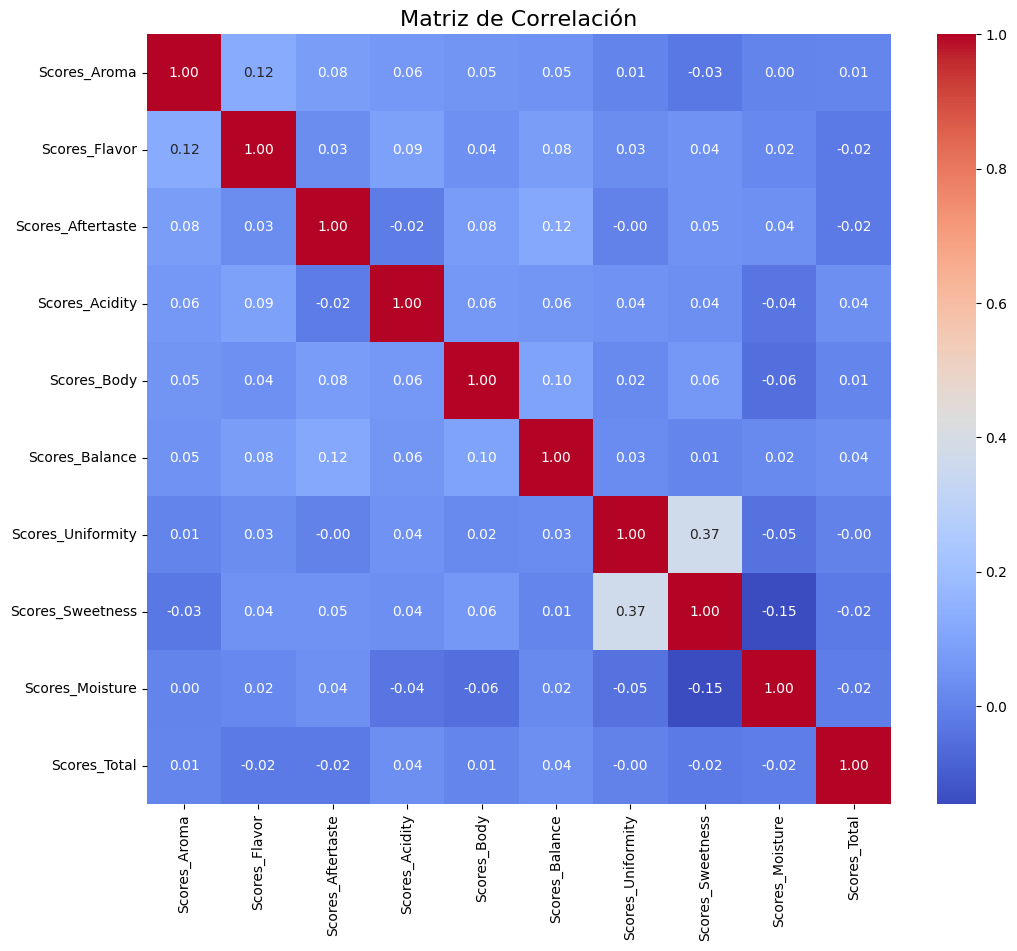

In [ ]:
# Calculamos la matriz de correlación
corMatrix_heart_BI = df.corr()

# Aumentamos el tamaño de la figura
plt.figure(figsize=(12, 10))

# Creamos el mapa de calor
sns.heatmap(corMatrix_heart_BI, annot=True, cmap='coolwarm', fmt='.2f')

# Añadimos título al gráfico
plt.title('Matriz de Correlación', fontsize=16)

# Mostramos el gráfico
plt.show()

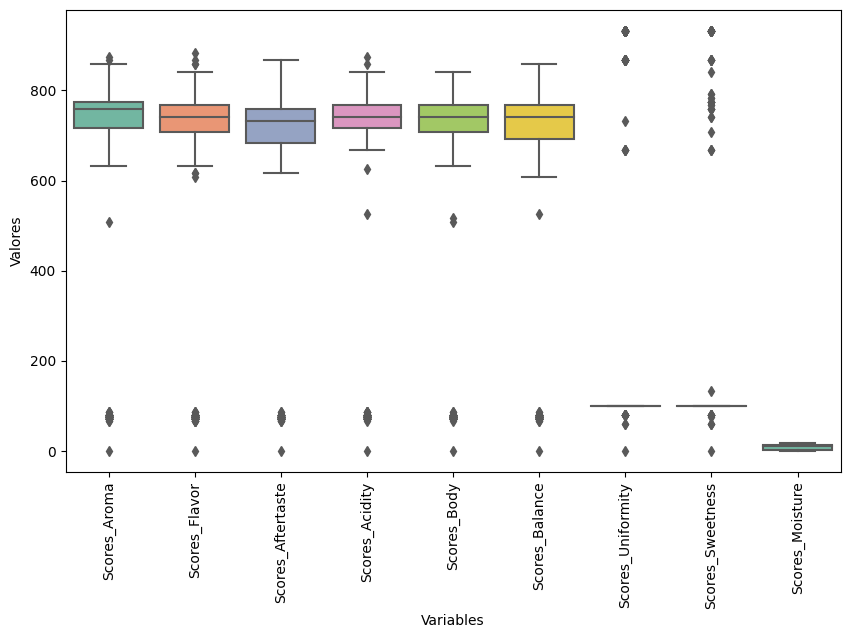

In [ ]:



# Creamos un subconjunto del DataFrame con las columnas seleccionadas.
subset_df = df.drop('Scores_Total', axis=1)

# Creamos un boxplot para las columnas seleccionadas.
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_df, orient="v", palette="Set2")

plt.ylabel("Valores")
plt.xlabel("Variables")
plt.xticks(rotation=90)
# Mostramos el gráfico.
plt.show()

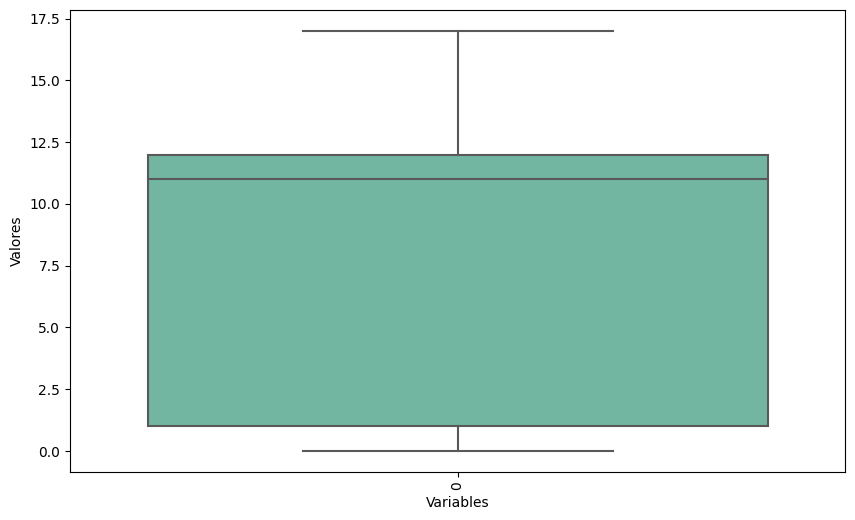

In [ ]:
# Creamos un boxplot para la columna Scores_Moisture porque no se puede apreciar en el gráfico anterior por estar en otro rango.
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_df['Scores_Moisture'], orient="v", palette="Set2")

plt.ylabel("Valores")
plt.xlabel("Variables")
plt.xticks(rotation=90)
# Mostramos el gráfico.
plt.show()

In [ ]:
#Cambiamos los nombres de las columnas para trabajar mas comodos
import re

df.columns = df.columns.to_series().replace(r'Scores_', '', regex=True)
df.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Sweetness,Moisture,Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green


Actividad 2

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import os

In [ ]:
# Dividimos los datos en X (características) e y (etiquetas)
X = df.drop('Color', axis=1)
y = df['Color']

# Codificamos las etiquetas a números
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1234)

# Configuramos el modelo SVM con kernel lineal
model = SVC(kernel='linear')

# Realizamos validación cruzada para diferentes valores
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Imprimimos los resultados de la validación cruzada para diferentes valores
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.4f}")

# Elegimos el valor de C que maximiza el rendimiento en validación cruzada
best_C = cv_scores.argmax() + 1
print(f"Mejor valor de C: {best_C}")

# Entrenamos el modelo con el mejor valor de C en el conjunto de entrenamiento completo
final_model = SVC(kernel='linear', C=best_C)
final_model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = final_model.predict(X_test)

# Evaluamos el rendimiento del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# resultados
print(f"Exactitud: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Exhaustividad: {recall:.4f}")

Fold 1: 0.7985
Fold 2: 0.8209
Fold 3: 0.7985
Fold 4: 0.7970
Fold 5: 0.7970
Mejor valor de C: 2
Exactitud: 0.7844
Precisión: 0.6323
Exhaustividad: 0.7844


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Actividad 3

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
model = SVC(kernel='rbf')

# Utilizamo GridSearchCV para buscar los mejores parámetros con k=5 en la validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Imprimimos los mejores parámetros encontrados por GridSearchCV
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Entrenamos el modelo con los mejores parámetros en el conjunto de entrenamiento completo
final_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
final_model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = final_model.predict(X_test)

# Evaluamos el rendimiento del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Imprimimos los resultados
print(f"Exactitud: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Exhaustividad: {recall:.4f}")

Mejores parámetros: {'C': 0.1, 'gamma': 0.01}
Exactitud: 0.7964
Precisión: 0.6343
Exhaustividad: 0.7964


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Actividad 4

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definimos los parámetros a explorar en el Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Cantidad de estimadores
    'max_depth': [None, 5, 10, 20]   # Máxima profundidad de los árboles
}

# Creamos un modelo de Random Forest
rf_model = RandomForestClassifier(random_state=123)

# Utilizamos GridSearchCV para buscar los mejores parámetros con k=5 en la validación cruzada
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Imprimimos los mejores parámetros encontrados por GridSearchCV
best_params_rf = grid_search_rf.best_params_
print("Mejores parámetros para Random Forest:", best_params_rf)

# Entrenamos el modelo con los mejores parámetros en el conjunto de entrenamiento completo
final_rf_model = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                                        max_depth=best_params_rf['max_depth'],
                                        random_state=123)
final_rf_model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred_rf = final_rf_model.predict(X_test)

# Evaluamos el rendimiento del modelo en el conjunto de prueba utilizando cross_val_score
cv_scores_rf = cross_val_score(final_rf_model, X_test, y_test, cv=5, scoring='accuracy')

# Imprimimos los resultados de la validación cruzada
#for i, score in enumerate(cv_scores_rf, start=1):
 #   print(f"Fold {i}: {score:.4f}")

# Calculamos y mostramos la precisión, exhaustividad y exactitud promedio
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"\nPrecision Random Forest: {precision_rf:.4f}")
print(f"Recall Random Forest: {recall_rf:.4f}")
print(f"Accuracy Random Forest: {accuracy_rf:.4f}")


Mejores parámetros para Random Forest: {'max_depth': 5, 'n_estimators': 50}

Precision Random Forest: 0.6333
Recall Random Forest: 0.7904
Accuracy Random Forest: 0.7904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
